# Baseline model

In [1]:
#Imports
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load DataFrame
df = pd.read_csv('../raw_data/stock_prices_latest.csv',nrows=20000)

In [ ]:
#Have a look at data
df

In [3]:
#Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
#Create Df's to plot (MSFT uniquement pour le BASELINE)
df0=df[df['symbol']=='MSFT'].reset_index()#symbols_lst[0]].reset_index()
df0 = df0[(df0.date.dt.year >= 2018 ) & (df0.date.dt.year <= 2018)]
df0 = df0[['date','close_adjusted']]
df0.columns = ['ds', 'y']
df0.sort_values(by=['ds'],inplace=True)

In [5]:
#Create Baseline df's
df0.reset_index(inplace=True)

In [6]:
df0.drop(['index'],axis=1,inplace=True)

In [7]:
for i in df0['y'].index:
    if i > 0:
        df0['yhat']=df0['y'].shift(1)

In [8]:
df0.dropna(inplace=True)

In [9]:
print("r2_score close :", r2_score(df0['y'], df0['yhat']))
print('Close MSE: :',mean_squared_error(df0['y'], df0['yhat']))

r2_score close : 0.7312870910285207
Close MSE: : 0.8170800000000003


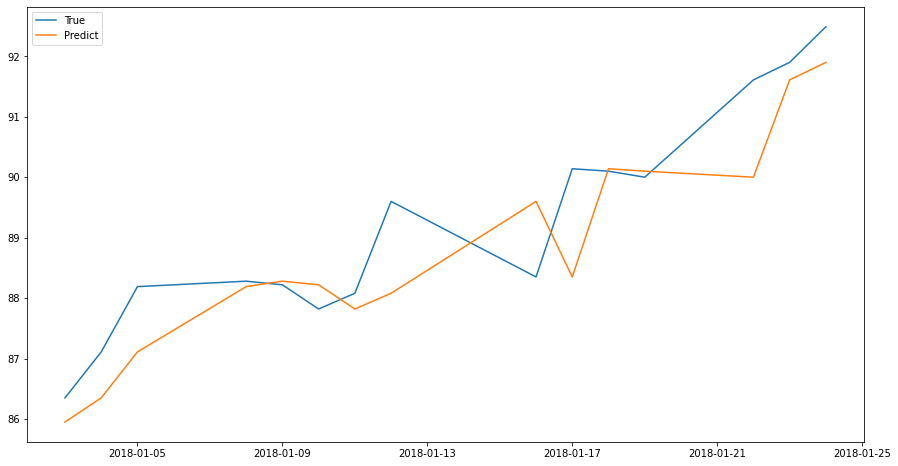

In [10]:
# plot predictions and expected results
plt.figure(figsize=(15, 8))               
plt.plot(df0['ds'],df0['y'],label="True")
plt.plot(df0['ds'],df0['yhat'],label="Predict")
plt.legend()
plt.show()